In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
import fsspec
from matplotlib import pyplot
from matplotlib import colormaps
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from metpy.plots import USCOUNTIES
import numpy
import open_radar_data
import pandas
from PIL import Image
import pyart
import random
import xarray as xr
import xradar as xd


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Define Output Directory
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/Radar_Meteo/Project/'

In [3]:
# Find File For Each Station
FS = fsspec.filesystem("s3", anon=True)
def Find_File(Station, YYYY, MM, DD, HH):
    File_Name = 's3://noaa-nexrad-level2/'+str(YYYY)+'/'+str(MM)+'/'+str(DD)+\
    '/'+Station+'/'+Station+str(YYYY)+str(MM)+str(DD)+'_'+str(HH)+'*'
    Files = sorted(FS.glob(File_Name))
    return (Files)

In [4]:
# List Files For Each Station
Files_KAMX = Find_File("KAMX", '2016', '10', '06', '18')
Files_KMLB = Find_File("KMLB", '2016', '10', '07', '07')
Files_KJAX = Find_File("KJAX", '2016', '10', '07', '22')
Files_KCLX = Find_File("KCLX", '2016', '10', '08', '08')
Files_KLTX = Find_File("KLTX", '2016', '10', '08', '19')
Files_KMHX = Find_File("KMHX", '2016', '10', '09', '03')
#Files_KLTX

In [5]:
# Create Files List
Files_List = \
['noaa-nexrad-level2/2016/10/06/KAMX/KAMX20161006_181237_V06', \
 'noaa-nexrad-level2/2016/10/07/KMLB/KMLB20161007_072855_V06', \
 'noaa-nexrad-level2/2016/10/07/KJAX/KJAX20161007_220858_V06', \
 'noaa-nexrad-level2/2016/10/08/KCLX/KCLX20161008_080718_V06', \
 'noaa-nexrad-level2/2016/10/08/KLTX/KLTX20161008_190555_V06', \
 'noaa-nexrad-level2/2016/10/09/KMHX/KMHX20161009_031639_V06']

In [6]:
# Create Stations List
Stations = ["KAMX", "KMLB", "KJAX", "KCLX", "KLTX", "KMHX"]

In [7]:
# Import File For Stations Lat Lon
Stations_DF = pandas.read_csv('Stations_Loc.csv')
Stations_DF

,Station,Station Lat,Station Lon,Storm Lat,Storm Lon,Timestamp
0,KAMX,25.611,-80.413,25.65,-78.26,06/18:12Z
1,KMLB,28.113,-80.654,27.98,-79.86,07/07:28Z
2,KJAX,30.485,-81.702,30.38,-80.66,07/22:08Z
3,KCLX,32.656,-81.042,32.00,-80.47,08/08:07Z
4,KLTX,33.989,-78.430,33.71,-78.52,08/19:05Z
5,KMHX,34.776,-76.876,34.28,-76.23,09/03:16Z


In [8]:
# Import File For Hurricane Matthew Track
Track_DF = pandas.read_csv('Hurricane_Track.csv')
Track_DF

,Year,Month,Day,Time (Z),Lat,Lon,Pressure (hPa),Windspeed (kt)
0,2016,10,6,0,23.00,-76.00,960,105
1,2016,10,6,3,23.38,-76.33,956,105
2,2016,10,6,6,23.80,-76.70,952,110
3,2016,10,6,9,24.23,-77.08,945,115
4,2016,10,6,12,24.70,-77.50,937,120
5,2016,10,6,15,25.18,-77.91,937,120
6,2016,10,6,18,25.70,-78.30,937,120
7,2016,10,6,21,26.20,-78.66,937,115
8,2016,10,7,0,26.70,-79.00,937,115
9,2016,10,7,3,27.18,-79.36,938,110


In [9]:
# Plot Storm Track With Radar Stations
def Plot_Storm_Track(Stations_DF, Track_DF, Savefig, Figname):
    Fig = pyplot.figure(figsize=[8,8])
    Axis = pyplot.subplot(1,1,1, projection=ccrs.PlateCarree())
# Add Coastlines and States
    Axis.coastlines(linewidth=0.3)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.3)
    Axis.add_feature(cfeature.STATES, linewidth=0.2)
# Plot Storm Track
    pyplot.plot(Track_DF['Lon'], Track_DF['Lat'], c='limegreen', linewidth=4.8)
# Plot Radar Stations
    pyplot.scatter(Stations_DF['Station Lon'], Stations_DF['Station Lat'], marker='*', c='red', s=316, zorder=2)
# Plot Storm Locations at Radar Timesteps
    pyplot.scatter(Stations_DF['Storm Lon'], Stations_DF['Storm Lat'], marker='o', c='black', s=128, zorder=3)
# Label Radar Stations and Storm Timestamps
    for i in range(len(Stations_DF)):
        Station = Stations_DF['Station'][i]
        Station_xloc = Stations_DF['Station Lon'][i] - 0.2
        Station_yloc = Stations_DF['Station Lat'][i] + 0.08
        Axis.text(Station_xloc, Station_yloc, Station, ha='right', va='center', \
        fontdict={'size':21},color='red')
        Timestamp = Stations_DF['Timestamp'][i]
        Timestamp_xloc = Stations_DF['Storm Lon'][i] + 0.3
        Timestamp_yloc = Stations_DF['Storm Lat'][i]
        Axis.text(Timestamp_xloc, Timestamp_yloc, Timestamp, ha='left', va='center', \
        fontdict={'size':16},color='black')
# Set xlim and ylim
    pyplot.xlim(-85,-73)
    pyplot.ylim(24,36)
    pyplot.xticks(numpy.arange(-85,-72,1))
    pyplot.yticks(numpy.arange(24,37,1))
    Gridlines = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
# Savefig
    pyplot.tight_layout()
    Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

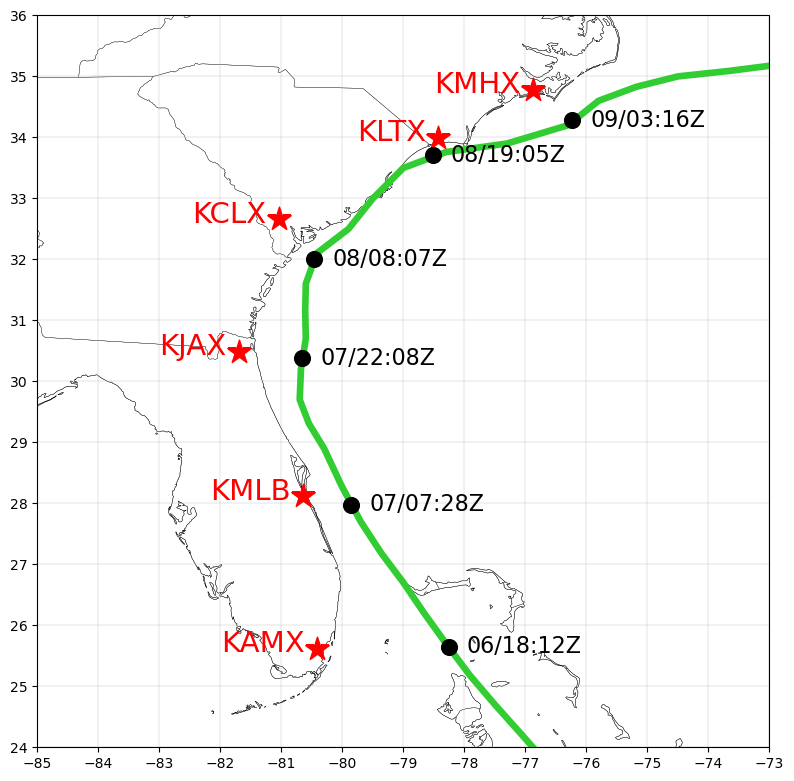

In [10]:
Plot_Storm_Track(Stations_DF, Track_DF, True, 'Hurricane_Track.png')

In [11]:
# Read Radar
Radar_KAMX = pyart.io.read_nexrad_archive(f's3://{Files_List[0]}')
Radar_KMLB = pyart.io.read_nexrad_archive(f's3://{Files_List[1]}')
Radar_KJAX = pyart.io.read_nexrad_archive(f's3://{Files_List[2]}')
Radar_KCLX = pyart.io.read_nexrad_archive(f's3://{Files_List[3]}')
Radar_KLTX = pyart.io.read_nexrad_archive(f's3://{Files_List[4]}')
Radar_KMHX = pyart.io.read_nexrad_archive(f's3://{Files_List[5]}')

In [12]:
# Create Dictionary of Radars
Radars = {"KAMX": Radar_KAMX, "KMLB": Radar_KMLB, "KJAX": Radar_KJAX, \
"KCLX": Radar_KCLX, "KLTX": Radar_KLTX, "KMHX": Radar_KMHX}

In [13]:
# Plotting Radar Formatting
def Radar_Formatting(Axis, Station, Zoom):
# Set xlim and ylim
    if Zoom == False:
        if Station == "KAMX":
            Lims = numpy.array([-82,-76,23,29])
        elif Station == "KMLB":
            Lims = numpy.array([-83,-77,26,32])
        elif Station == "KJAX":
            Lims = numpy.array([-84,-78,28,34])
        elif Station == "KCLX":
            Lims = numpy.array([-84,-78,30,36])
        elif Station == "KLTX":
            Lims = numpy.array([-81,-75,31,37])
        elif Station == "KMHX":
            Lims = numpy.array([-80,-74,32,38])
    else:
        if Station == "KAMX":
            Lims = numpy.array([-79,-78,25,26])
        elif Station == "KMLB":
            Lims = numpy.array([-80.5,-79.5,27.5,28.5])
        elif Station == "KJAX":
            Lims = numpy.array([-81,-80,30,31])
        elif Station == "KCLX":
            Lims = numpy.array([-81,-80,31.6,32.6])
        elif Station == "KLTX":
            Lims = numpy.array([-79,-78,33.3,34.3])
        elif Station == "KMHX":
            Lims = numpy.array([-77,-76,34,35])
    pyplot.xlim(Lims[0]-0.0001,Lims[1]+0.0001)
    pyplot.ylim(Lims[2]-0.0001,Lims[3]+0.0001)
# Add Gridlines
    Gridlines = Axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, \
    linewidth=0.3, color='silver', linestyle='-', zorder=1)
# Labels Only Left and Bottom
    Gridlines.top_labels = False
    Gridlines.right_labels = False
# Set Gridline Labels Fontsize
    Gridlines.xlabel_style = {'fontsize':10}
    Gridlines.ylabel_style = {'fontsize':10}
# Add Coastlines and States
    Axis.coastlines(linewidth=0.5, zorder=4)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.4, zorder=3)
    Axis.add_feature(cfeature.STATES, linewidth=0.3, zorder=2)

In [14]:
# Produce Radar Imageries
def Radar_Imagery(Radars, Stations_DF, Var, Sweep, Zoom, Station_Loc, Storm_Loc, Fig_Label, Savefig, Figname):
    Fig = pyplot.figure(figsize=[12,15])
    abc = ['(a)','(b)','(c)','(d)', '(e)', '(f)']
    for i in range(len(Stations_DF)):
        Axis = pyplot.subplot(3,2,i+1, projection=ccrs.PlateCarree())
# Plot Radar Station Location
        Station = Stations_DF['Station'][i]
        if Station_Loc == True:
            pyplot.scatter(Stations_DF['Station Lon'][i], Stations_DF['Station Lat'][i], marker='*', \
            c='black', s=316, zorder=5)
# Plot Storm Center
        if Storm_Loc == True:
            pyplot.scatter(Stations_DF['Storm Lon'][i], Stations_DF['Storm Lat'][i], marker='o', \
            c='black', s=48, zorder=6)
# Plot Radar Imagery
        Radar = Radars[Station]
        Display = pyart.graph.RadarMapDisplay(Radar)
        if Var == 'reflectivity':
            Display.plot_ppi_map('reflectivity', sweep=Sweep, vmin=0, vmax=60, ax=Axis, \
            cmap='pyart_HomeyerRainbow', embellish=False, add_grid_lines=False)
        Radar_Formatting(Axis, Station, Zoom)
# Label Subfigure
        if Fig_Label == True:
            Axis.text(0.95, 0.95, str(abc[i]), ha='center', va='center', \
            transform=Axis.transAxes, fontdict={'size':18}, color='black')
# Savefig
    pyplot.tight_layout()
    Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

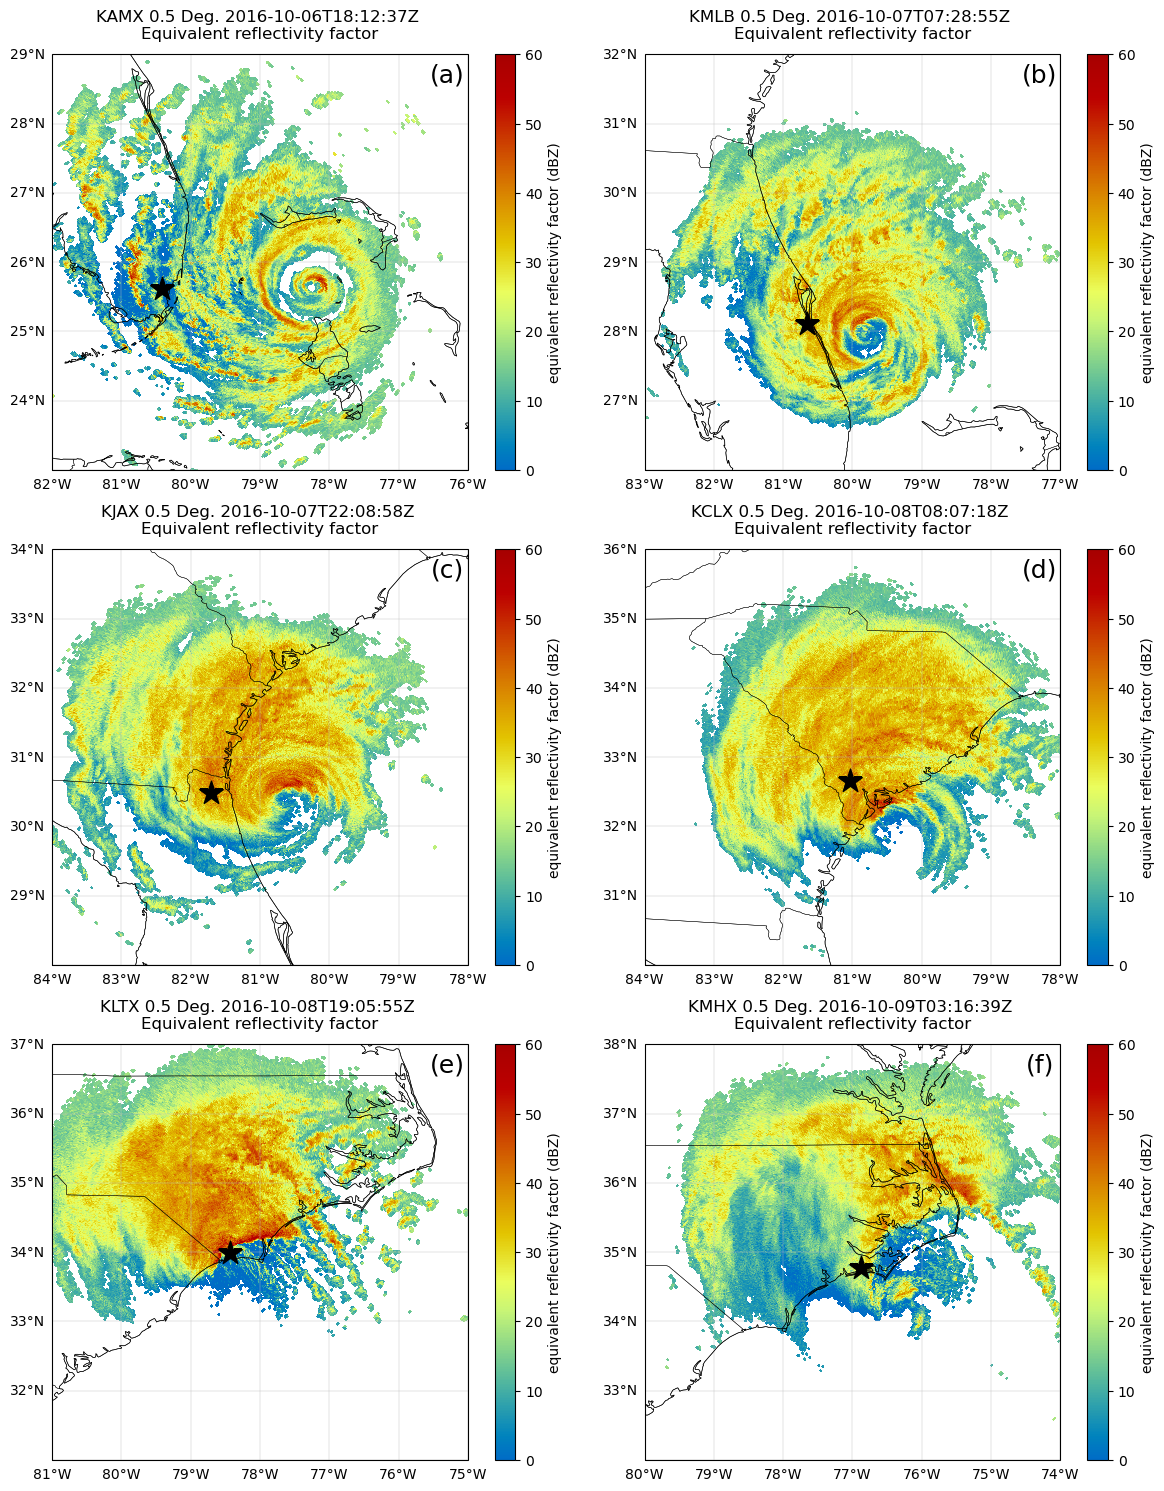

In [15]:
Radar_Imagery(Radars, Stations_DF, 'reflectivity', 0, False, True, False, True, True, 'Reflectivity.png')

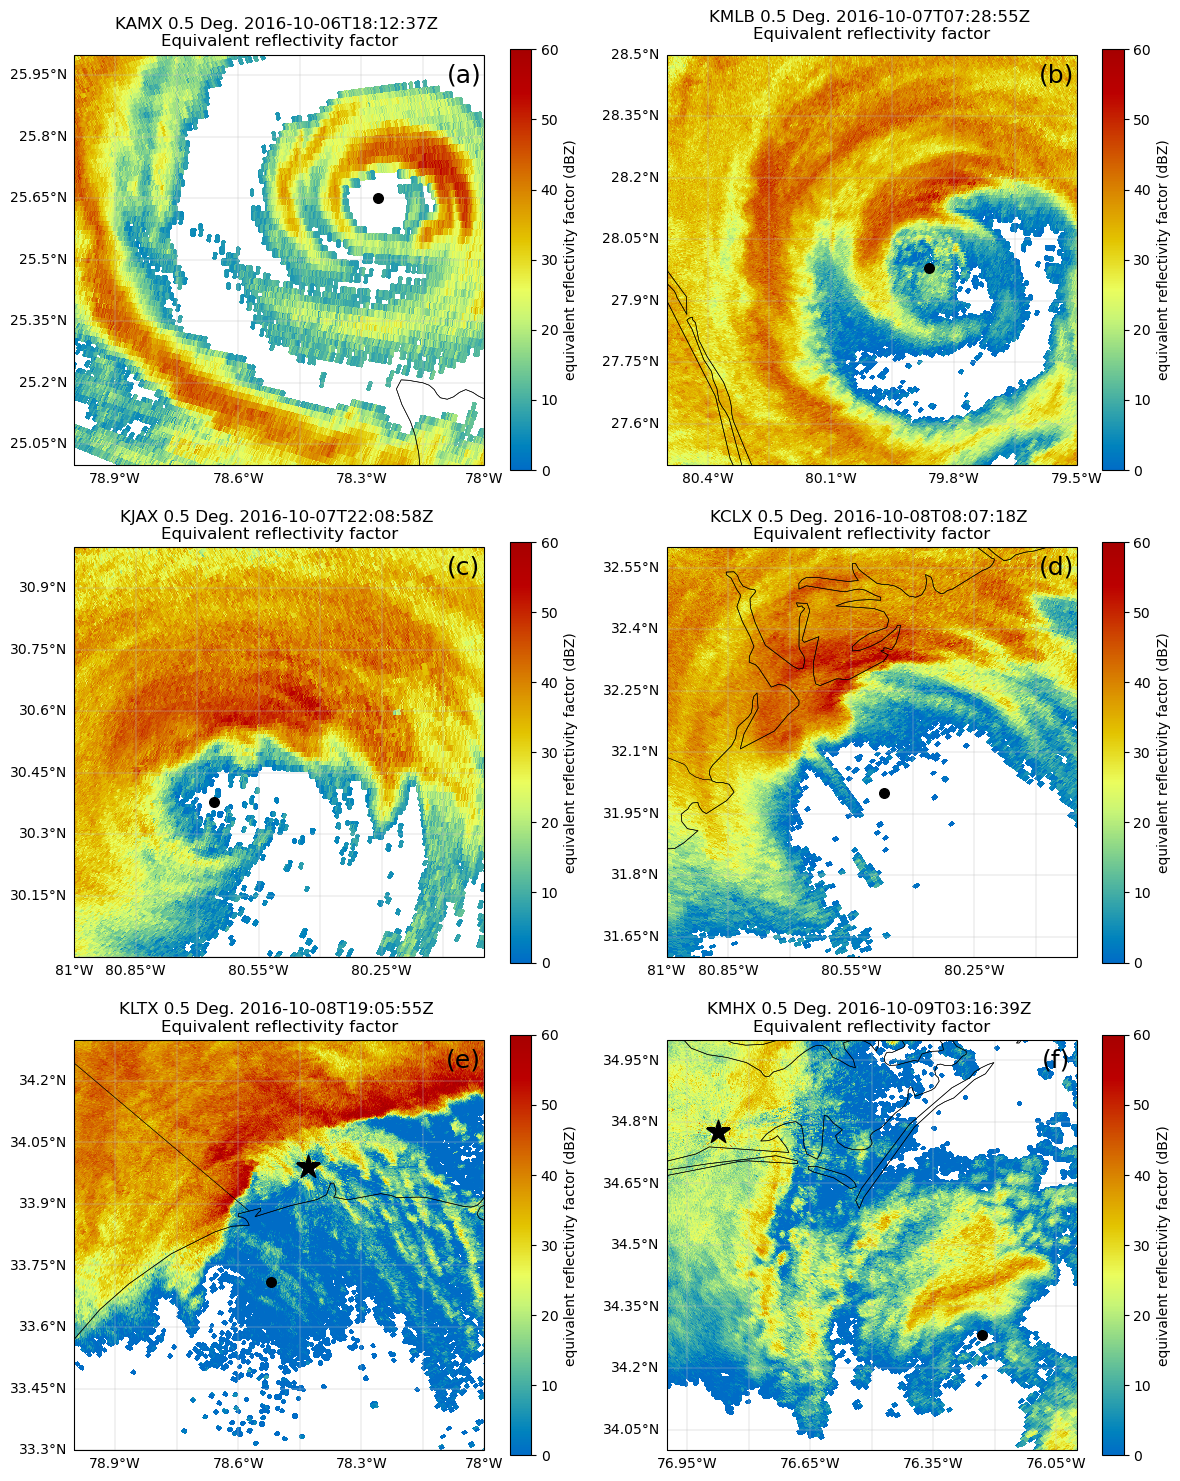

In [16]:
Radar_Imagery(Radars, Stations_DF, 'reflectivity', 0, True, True, True, True, True, 'Reflectivity_Zoom.png')

In [17]:
# Create DataFrame to Store Data
def Create_DF(Radars, Stations_DF, i):
# Create Array For Radar Reflectivity
    Radar = Radars[Stations_DF['Station'][i]]
    Reflectivity = numpy.array(Radar.fields['reflectivity']['data'])
#
# Create Arrays For Ranges, Azimuths, and Elevations
    Ranges = numpy.array(Radar.range['data']) / 1000
    Elevations = numpy.array(Radar.elevation['data'])
    Azimuths = numpy.array(Radar.azimuth['data'])
# Convert Arrays Into 1D Lists
    Ravel_Range = []
    Ravel_Azim = []
    Ravel_Elev = []
    for k in range(len(Elevations)):
        for j in range(len(Ranges)):
            Ravel_Range.append(Ranges[j])
            Ravel_Azim.append(Azimuths[k])
            Ravel_Elev.append(Elevations[k])
# Unravel Reflectivity Array
    Ravel_Reflect = numpy.ravel(Reflectivity)
#
# Create Initial DataFrame
    Ravel_DF = pandas.DataFrame({'Reflectivity': Ravel_Reflect, 'Range (km)': numpy.array(Ravel_Range), \
    'Azimuth Angle': numpy.array(Ravel_Azim), 'Elevation Angle': numpy.array(Ravel_Elev)})
# Filter For Reflectivity >= 0 and Elevation < 2 Degrees
    Filtered_DF = Ravel_DF[(Ravel_DF['Reflectivity'] > 0) & (Ravel_DF['Elevation Angle'] < 2)].reset_index().drop('index', axis=1)
#
# Create Empty Arrays With Length of Filtered_DF
    Cart_x = numpy.zeros(len(Filtered_DF))
    Cart_y = numpy.zeros(len(Filtered_DF))
    Cart_z = numpy.zeros(len(Filtered_DF))
    Cart_x_Storm = numpy.zeros(len(Filtered_DF))
    Cart_y_Storm = numpy.zeros(len(Filtered_DF))
    Radius_Storm = numpy.zeros(len(Filtered_DF))
#
# Calculate Cartesian Coordinates of Storm Center
    Storm_x, Storm_y = pyart.core.geographic_to_cartesian_aeqd(Stations_DF['Storm Lon'][i], Stations_DF['Storm Lat'][i], \
    Stations_DF['Station Lon'][i], Stations_DF['Station Lat'][i])
#
# Calculate Cartesian Coordinates of Each Datapoint
    for l in range(len(Filtered_DF)):
        Cart_x[l], Cart_y[l], Cart_z[l] = pyart.core.antenna_to_cartesian\
        (Filtered_DF['Range (km)'][l], Filtered_DF['Azimuth Angle'][l], Filtered_DF['Elevation Angle'][l])
# Calculate Distance of Each Datapoint From Storm Center
        Radius_Storm[l] = numpy.sqrt((Cart_x[l] - Storm_x) ** 2 + (Cart_y[l] - Storm_y) ** 2) / 1000.
        Cart_x_Storm[l] = Storm_x
        Cart_y_Storm[l] = Storm_y
        if l % 728000 == 0:
            print (l)
#
# Add Cartesian Coordinates Information to DF
    Output_DF = Filtered_DF.copy()
    Output_DF['x'], Output_DF['y'], Output_DF['z'] = Cart_x, Cart_y, Cart_z
    Output_DF['x_Storm'], Output_DF['y_Storm'] = Cart_x_Storm, Cart_y_Storm
    Output_DF['Storm Radius (km)'] = Radius_Storm
    return (Output_DF)

In [18]:
#DF_KAMX = Create_DF(Radars, Stations_DF, 0)
#DF_KAMX

0
728000
1456000
2184000
2912000
3640000
4368000
5096000


,Reflectivity,Range (km),Azimuth Angle,Elevation Angle,x,y,z,x_Storm,y_Storm,Storm Radius (km)
0,0.5,7.125,316.205750,0.667419,-4930.620246,5142.636164,85.982521,215801.178647,6090.261601,220.733833
1,5.5,7.625,316.205750,0.667419,-5276.624887,5503.518951,92.240753,215801.178647,6090.261601,221.078582
2,8.0,7.875,316.205750,0.667419,-5449.627016,5683.960145,95.380903,215801.178647,6090.261601,221.251179
3,9.5,8.125,316.205750,0.667419,-5622.629016,5864.401206,98.528409,215801.178647,6090.261601,221.423923
4,11.0,8.375,316.205750,0.667419,-5795.630889,6044.842133,101.683272,215801.178647,6090.261601,221.596814
...,...,...,...,...,...,...,...,...,...,...
5099497,17.5,294.375,55.725403,0.483398,243079.246497,165659.544657,7580.848538,215801.178647,6090.261601,161.884061
5099498,19.0,294.625,55.725403,0.483398,243285.457679,165800.078458,7591.615324,215801.178647,6090.261601,162.057432
5099499,19.0,294.875,55.725403,0.483398,243491.668338,165940.611903,7602.389448,215801.178647,6090.261601,162.231001
5099500,21.5,295.125,55.725403,0.483398,243697.878475,166081.144992,7613.170909,215801.178647,6090.261601,162.404768


In [19]:
DF_KMLB = Create_DF(Radars, Stations_DF, 1)
DF_KMLB

0
728000
1456000
2184000
2912000


,Reflectivity,Range (km),Azimuth Angle,Elevation Angle,x,y,z,x_Storm,y_Storm,Storm Radius (km)
0,26.0,2.125,9.239502,0.716858,341.165878,2097.259075,26.852060,77968.30379,-14534.715788,79.388885
1,30.5,2.375,9.239502,0.716858,381.302898,2343.994562,30.046068,77968.30379,-14534.715788,79.401723
2,33.0,2.625,9.239502,0.716858,421.439887,2590.729862,33.247433,77968.30379,-14534.715788,79.415345
3,37.0,2.875,9.239502,0.716858,461.576847,2837.464977,36.456154,77968.30379,-14534.715788,79.429751
4,35.0,3.125,9.239502,0.716858,501.713775,3084.199905,39.672232,77968.30379,-14534.715788,79.444942
...,...,...,...,...,...,...,...,...,...,...
3370860,21.0,173.125,131.748047,1.450195,129039.338865,-115164.110693,6143.403849,77968.30379,-14534.715788,112.847356
3370861,28.0,173.375,131.748047,1.450195,129225.529481,-115330.280769,6154.821366,77968.30379,-14534.715788,113.079835
3370862,22.5,173.625,131.748047,1.450195,129411.719598,-115496.450399,6166.246220,77968.30379,-14534.715788,113.312386
3370863,28.0,173.875,131.748047,1.450195,129597.909213,-115662.619582,6177.678412,77968.30379,-14534.715788,113.545009


In [20]:
DF_KJAX = Create_DF(Radars, Stations_DF, 2)
DF_KJAX

0
728000
1456000
2184000
2912000
3640000


,Reflectivity,Range (km),Azimuth Angle,Elevation Angle,x,y,z,x_Storm,y_Storm,Storm Radius (km)
0,34.0,2.125,254.124756,0.645447,-2043.816078,-581.241712,24.203740,99954.299628,-11214.830497,102.550908
1,35.0,2.375,254.124756,0.645447,-2284.264259,-649.622871,27.086183,99954.299628,-11214.830497,102.783012
2,37.5,2.625,254.124756,0.645447,-2524.712277,-718.003984,29.975982,99954.299628,-11214.830497,103.015199
3,38.0,2.875,254.124756,0.645447,-2765.160131,-786.385050,32.873138,99954.299628,-11214.830497,103.247469
4,38.5,3.125,254.124756,0.645447,-3005.607821,-854.766069,35.777650,99954.299628,-11214.830497,103.479822
...,...,...,...,...,...,...,...,...,...,...
4221848,9.0,153.625,137.603760,0.483398,103551.488406,-113418.295669,2684.822854,99954.299628,-11214.830497,102.266750
4221849,9.0,153.875,137.603760,0.483398,103719.939260,-113602.797207,2691.454852,99954.299628,-11214.830497,102.457190
4221850,10.5,154.125,137.603760,0.483398,103888.389852,-113787.298456,2698.094200,99954.299628,-11214.830497,102.647885
4221851,11.5,157.625,137.603760,0.483398,106246.670344,-116370.285512,2791.816816,99954.299628,-11214.830497,105.343551


In [21]:
DF_KCLX = Create_DF(Radars, Stations_DF, 3)
DF_KCLX

0
728000
1456000
2184000
2912000
3640000
4368000
5096000
5824000
6552000


,Reflectivity,Range (km),Azimuth Angle,Elevation Angle,x,y,z,x_Storm,y_Storm,Storm Radius (km)
0,37.5,2.125,81.246643,0.672913,2100.098214,323.361991,25.222328,53939.722251,-72799.417021,89.634187
1,34.0,2.375,81.246643,0.672913,2347.167769,361.404451,28.224604,53939.722251,-72799.417021,89.522609
2,44.0,2.625,81.246643,0.672913,2594.237149,399.446884,31.234237,53939.722251,-72799.417021,89.411591
3,34.0,2.875,81.246643,0.672913,2841.306353,437.489291,34.251226,53939.722251,-72799.417021,89.301134
4,35.0,3.125,81.246643,0.672913,3088.375382,475.531670,37.275571,53939.722251,-72799.417021,89.191242
...,...,...,...,...,...,...,...,...,...,...
6601703,10.5,209.375,145.719910,0.483398,117875.587845,-172928.199851,4345.660732,53939.722251,-72799.417021,118.800539
6601704,10.0,209.625,145.719910,0.483398,118016.248482,-173134.554629,4353.931329,53939.722251,-72799.417021,119.050162
6601705,13.0,210.125,145.719910,0.483398,118297.568935,-173547.262980,4370.494560,53939.722251,-72799.417021,119.549408
6601706,15.0,210.375,145.719910,0.483398,118438.228750,-173753.616552,4378.787194,53939.722251,-72799.417021,119.799031


In [22]:
DF_KLTX = Create_DF(Radars, Stations_DF, 4)
DF_KLTX

0
728000
1456000
2184000
2912000
3640000
4368000


,Reflectivity,Range (km),Azimuth Angle,Elevation Angle,x,y,z,x_Storm,y_Storm,Storm Radius (km)
0,11.5,2.125,263.262634,0.667419,-2110.176159,-249.283987,25.018610,-8324.875656,-31019.72357,31.391758
1,17.0,2.625,263.262634,0.667419,-2606.686381,-307.938828,30.982586,-8324.875656,-31019.72357,31.239581
2,19.0,2.875,263.262634,0.667419,-2854.941230,-337.266217,33.975608,-8324.875656,-31019.72357,31.166222
3,20.5,3.125,263.262634,0.667419,-3103.195904,-366.593586,36.975987,-8324.875656,-31019.72357,31.094699
4,19.5,3.375,263.262634,0.667419,-3351.450402,-395.920935,39.983722,-8324.875656,-31019.72357,31.025026
...,...,...,...,...,...,...,...,...,...,...
4933050,16.0,232.375,276.759338,0.527344,-230634.482812,27335.507293,5315.414874,-8324.875656,-31019.72357,229.841020
4933051,18.0,232.625,276.759338,0.527344,-230882.423957,27364.894039,5324.552619,-8324.875656,-31019.72357,230.088300
4933052,14.5,232.875,276.759338,0.527344,-231130.364570,27394.280722,5333.697706,-8324.875656,-31019.72357,230.335585
4933053,14.5,233.125,276.759338,0.527344,-231378.304648,27423.667341,5342.850137,-8324.875656,-31019.72357,230.582875


In [23]:
DF_KMHX = Create_DF(Radars, Stations_DF, 5)
DF_KMHX

0
728000
1456000
2184000
2912000
3640000
4368000
5096000


,Reflectivity,Range (km),Azimuth Angle,Elevation Angle,x,y,z,x_Storm,y_Storm,Storm Radius (km)
0,33.5,2.125,98.160095,0.708618,2103.317661,-301.597538,26.546484,59354.664408,-54962.599202,79.155175
1,30.0,2.375,98.160095,0.708618,2350.765929,-337.079477,29.704543,59354.664408,-54962.599202,78.951832
2,31.0,2.625,98.160095,0.708618,2598.214014,-372.561390,32.869957,59354.664408,-54962.599202,78.748758
3,24.5,2.875,98.160095,0.708618,2845.661914,-408.043276,36.042729,59354.664408,-54962.599202,78.545954
4,31.0,3.125,98.160095,0.708618,3093.109629,-443.525135,39.222856,59354.664408,-54962.599202,78.343423
...,...,...,...,...,...,...,...,...,...,...
5236550,8.5,132.125,143.692932,0.571289,78210.553088,-106443.243133,2344.584575,59354.664408,-54962.599202,54.825188
5236551,10.5,132.375,143.692932,0.571289,78358.492091,-106644.585620,2350.967636,59354.664408,-54962.599202,55.065172
5236552,13.0,132.625,143.692932,0.571289,78506.430871,-106845.927803,2357.358048,59354.664408,-54962.599202,55.305243
5236553,13.5,132.875,143.692932,0.571289,78654.369429,-107047.269684,2363.755811,59354.664408,-54962.599202,55.545400


In [24]:
# Create Dictionary of DataFrames
DF_Radars = {"KMLB": DF_KMLB, "KJAX": DF_KJAX, "KCLX": DF_KCLX, "KLTX": DF_KLTX, "KMHX": DF_KMHX}

In [25]:
# Create Subset of Datapoints Based on Altitude, Storm Radius and Quadrant
def Create_Subset(DF, Quadrant, z_Min, z_Max, Radius_Min, Radius_Max):
    DF_z = DF[(DF['z'] < z_Max) & (DF['z'] >= z_Min)]
    DF_Radius = DF_z[(DF_z['Storm Radius (km)'] < Radius_Max) & (DF_z['Storm Radius (km)'] >= Radius_Min)]
    if Quadrant == 1:
        DF_Quad = DF_Radius[(DF_Radius['x'] >= DF_Radius['x_Storm']) & (DF_Radius['y'] >= DF_Radius['y_Storm'])]
    elif Quadrant == 2:
        DF_Quad = DF_Radius[(DF_Radius['x'] < DF_Radius['x_Storm']) & (DF_Radius['y'] >= DF_Radius['y_Storm'])]
    elif Quadrant == 3:
        DF_Quad = DF_Radius[(DF_Radius['x'] < DF_Radius['x_Storm']) & (DF_Radius['y'] < DF_Radius['y_Storm'])]
    elif Quadrant == 4:
        DF_Quad = DF_Radius[(DF_Radius['x'] >= DF_Radius['x_Storm']) & (DF_Radius['y'] < DF_Radius['y_Storm'])]
    else:
        DF_Quad = DF_Radius
    return (DF_Quad)

In [26]:
# Create Subset of Datapoints Based on Reflectivity Value
def Subset_dBZ(DF, dBZ_Min, dBZ_Max):
    DF_dBZ = DF[(DF['Reflectivity'] < dBZ_Max) & (DF['Reflectivity'] >= dBZ_Min)]
    return (DF_dBZ)

In [27]:
# Find Distribution of dBZ Values
def Distr_dBZ(DF, Quadrant, dBZ_Min, dBZ_Max, dBZ_Bin, Radius_Max, Cum):
    dBZ_Vals = numpy.arange(dBZ_Min, dBZ_Max+dBZ_Bin, dBZ_Bin)
    Percents = numpy.zeros(len(dBZ_Vals))
    DF_Subset = Create_Subset(DF, Quadrant, 0, 5000, 0, Radius_Max)
    for i in range(len(dBZ_Vals)):
        if Cum == True:
            DF_dBZ = Subset_dBZ(DF_Subset, dBZ_Vals[i], 728)
        else:
            DF_dBZ = Subset_dBZ(DF_Subset, dBZ_Vals[i], dBZ_Vals[i]+dBZ_Bin)
#        print (dBZ_Vals[i], len(DF_Subset), len(DF_dBZ))
        Percents[i] = len(DF_dBZ) / len(DF_Subset)
    return (Percents)

In [28]:
Distr_dBZ(DF_KMLB, 0, 10, 60, 5, 200, True)

array([9.48658434e-01, 8.91308545e-01, 7.85793165e-01, 6.08152172e-01,
       3.67041183e-01, 1.39696457e-01, 3.55235238e-02, 6.17769485e-03,
       8.14004536e-04, 3.17065437e-04, 1.70388798e-04])

In [29]:
Distr_dBZ(DF_KMLB, 0, 10, 60, 10, 200, False)

array([1.62865269e-01, 4.18751982e-01, 3.31517659e-01, 3.47095193e-02,
       6.43615738e-04, 1.35159305e-04])

In [30]:
# Create Stacked Bar Graphs
def Stacked_Bar_Graph(Axis, Timestamps, Percents, Colours):
    L = len(Percents)
    for i in range(L):
        K = L-1-i
        Cum_Sum = numpy.sum(Percents[K+1:L], axis=0)
#        print (Cum_Sum)
        Axis.bar(Timestamps, Percents[K], bottom=Cum_Sum, color=Colours[i])

In [31]:
# Plot Distribution of dBZ Values
def Plot_Distr_dBZ(Axes, i, j, DF_Radars, Quadrant, Direction):
    Stations = list(Stations_DF['Station'][1:])
    Timestamps = list(Stations_DF['Timestamp'][1:])
    Percents = numpy.zeros((9,5))
# Find Percentages
    for k in range(5):
        DF_Radar = DF_Radars[Stations[k]]
        dBZ_Percents = Distr_dBZ(DF_Radar, Quadrant, 10, 50, 5, 200, False)
        for l in range(9):
            Percents[l][k] = dBZ_Percents[l]
# Plot Stacked Bar Graph
    Colours = ['red', 'darkorange', 'orange', 'gold', 'yellow', 'greenyellow', 'limegreen', 'lightseagreen', 'dodgerblue']
    dBZ_Vals = ['>=50dBZ', '45~50dBZ', '40~45dBZ', '35~40dBZ', '30~35dBZ', '25~30dBZ', '20~25dBZ', '15~20dBZ', '10~15dBZ']
    Stacked_Bar_Graph(Axes[i][j], Timestamps, Percents, Colours)
# Add Legend
    if i == 1 and j == 0:
        Axes[i][j].legend(dBZ_Vals, loc=1, fontsize=11)
# Formatting
    Axes[i][j].set_ylim(0,1)
    if i == 1:
        Axes[i][j].set_xlabel('Time', fontsize=14)
    if j == 0:
        Axes[i][j].set_ylabel('Percentage of Datapoints', fontsize=14)
    Title = Direction + ' Quadrant of Storm'
    Axes[i][j].set_title(Title, fontsize=20)
#    Gridlines = Axes[i][j].grid(linewidth=0.3, color='silver', linestyle='-')

In [32]:
# Plot Distribution of dBZ Values at Each Quadrant
def Plot_dBZ_Quadrants(DF_Radars, Figname):
    Fig = pyplot.figure(figsize=[12,12])
    Axes = Fig.subplots(2,2, sharex=False, sharey=True)
# Northwest Quadrant
    Plot_Distr_dBZ(Axes, 0, 0, DF_Radars, 2, 'Northwest')
# Northeast Quadrant
    Plot_Distr_dBZ(Axes, 0, 1, DF_Radars, 1, 'Northeast')
# Southwest Quadrant
    Plot_Distr_dBZ(Axes, 1, 0, DF_Radars, 3, 'Southwest')
# Southeast Quadrant
    Plot_Distr_dBZ(Axes, 1, 1, DF_Radars, 4, 'Southeast')
# Savefig
    pyplot.tight_layout()
    Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

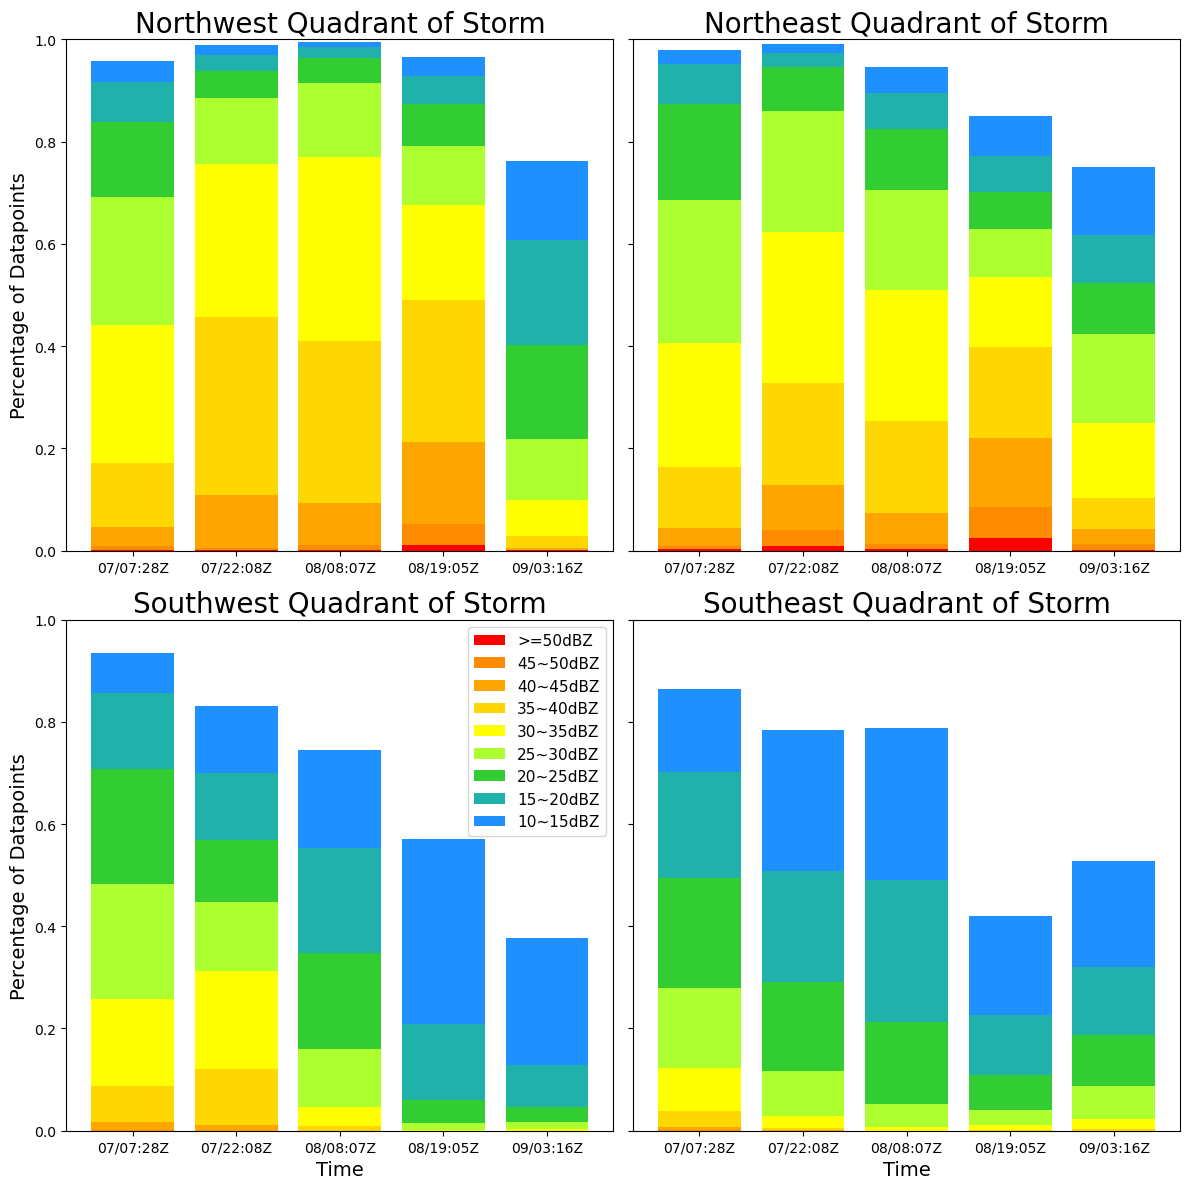

In [33]:
Plot_dBZ_Quadrants(DF_Radars, 'dBZ_Quadrants')

In [34]:
# Create Pie Chart
def Pie_Chart():

In [ ]:
# Plot Distribution

In [35]:
KMLB_NE = Create_Subset(DF_KMLB, 1, 0, 5000, 0, 200)
KMLB_NE

,Reflectivity,Range (km),Azimuth Angle,Elevation Angle,x,y,z,x_Storm,y_Storm,Storm Radius (km)
34512,24.0,197.875,23.222351,0.571289,77986.108329,181759.368818,4276.530738,77968.30379,-14534.715788,196.294085
34513,22.5,198.125,23.222351,0.571289,78084.579268,181988.871432,4284.846411,77968.30379,-14534.715788,196.523622
34514,24.0,198.375,23.222351,0.571289,78183.050014,182218.373597,4293.169430,77968.30379,-14534.715788,196.753207
34515,19.5,198.625,23.222351,0.571289,78281.520567,182447.875312,4301.499794,77968.30379,-14534.715788,196.982840
34516,23.0,198.875,23.222351,0.571289,78379.990928,182677.376578,4309.837504,77968.30379,-14534.715788,197.212522
...,...,...,...,...,...,...,...,...,...,...
3338579,6.0,80.375,100.247498,1.450195,79046.275838,-14290.329898,2414.032693,77968.30379,-14534.715788,1.105327
3338580,0.5,80.875,100.247498,1.450195,79537.862023,-14379.200989,2431.427346,77968.30379,-14534.715788,1.577244
3338581,4.0,81.125,100.247498,1.450195,79783.654360,-14423.636398,2440.135693,77968.30379,-14534.715788,1.818746
3338582,8.0,81.375,100.247498,1.450195,80029.446193,-14468.071715,2448.851386,77968.30379,-14534.715788,2.062220


In [36]:
Subset_dBZ(KMLB_NE, 50, 728)

,Reflectivity,Range (km),Azimuth Angle,Elevation Angle,x,y,z,x_Storm,y_Storm,Storm Radius (km)
165111,51.0,78.625,83.702087,0.469666,78139.707643,8623.822562,1008.307463,77968.30379,-14534.715788,23.159173
165119,51.0,80.625,83.702087,0.469666,80127.090688,8843.158406,1043.444512,77968.30379,-14534.715788,23.477337
165121,50.5,81.125,83.702087,0.469666,80623.933872,8897.992082,1052.302318,77968.30379,-14534.715788,23.582709
165122,51.0,81.375,83.702087,0.469666,80872.355075,8925.408878,1056.742253,77968.30379,-14534.715788,23.639183
165124,50.0,81.875,83.702087,0.469666,81369.196702,8980.242383,1065.644185,77968.30379,-14534.715788,23.759616
...,...,...,...,...,...,...,...,...,...,...
3322619,52.5,80.125,86.748047,1.450195,79948.899915,4542.561665,2405.346386,77968.30379,-14534.715788,19.179814
3322620,51.0,80.375,86.748047,1.450195,80198.275898,4556.730788,2414.032693,77968.30379,-14534.715788,19.221241
3322627,51.0,82.125,86.748047,1.450195,81943.893473,4655.913835,2475.042544,77968.30379,-14534.715788,19.598101
3323313,50.0,81.625,87.261658,1.450195,81483.357798,3897.309201,2457.574425,77968.30379,-14534.715788,18.764199
